# GT function analysis: Perovskite additives

In [1]:
import os
import re
import glob
import pickle
import datetime
from mordred import Calculator, descriptors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from rdkit import Chem
from rdkit.Chem import Draw
import sys

size_model_path = '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/0_Create_Ground_Truth_Model/pvkadditives/pvk_rfr_size.pkl'

with open(size_model_path, 'rb') as f:
    rf_model = pickle.load(f)

In [2]:
# from mordred import Calculator, descriptors
from sklearn.ensemble import RandomForestRegressor
# from rdkit.Chem import PandasTools
import pickle

pvk_size_feature_list = ['Reagent1 (ul)','Reagent2 (ul)','Reagent3 (ul)','Reagent4 (ul)','lab_code','ATSC5v', 'AATSC5Z', 'MATS8se']
print(pvk_size_feature_list)

['Reagent1 (ul)', 'Reagent2 (ul)', 'Reagent3 (ul)', 'Reagent4 (ul)', 'lab_code', 'ATSC5v', 'AATSC5Z', 'MATS8se']


In [3]:
import pandas as pd
from rdkit import Chem
from mordred import Calculator, descriptors

# 读取 CSV 文件
datapath = '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/0_Create_Ground_Truth_Model/datasets/combined_compiledData_wmol.csv'
df = pd.read_csv(datapath)
#df = df[df['crystal_size'] >= 1.0]
# 初始化 Mordred 特征计算器（忽略 3D 描述符）
calc = Calculator(descriptors, ignore_3D=True)

# 提取唯一分子集合
unique_molecules = set(df['SMILES'])

# 计算分子特征并存储到字典
features_dict = {}
for smiles in unique_molecules:
    mol = Chem.MolFromSmiles(smiles)
    if mol:  # 确保分子解析成功
        features_dict[smiles] = calc(mol)
    else:
        features_dict[smiles] = None  # 如果解析失败，填充 None

# 将特征转换为 DataFrame
features_df = pd.DataFrame.from_dict(
    {smiles: list(features_dict[smiles]) if features_dict[smiles] else [None] * len(calc.descriptors)
     for smiles in features_dict},
    orient='index',
    columns=[str(d) for d in calc.descriptors]
)

# 重置索引并合并回原始 DataFrame
features_df.reset_index(inplace=True)
features_df.rename(columns={'index': 'SMILES'}, inplace=True)
df = df.merge(features_df, on='SMILES', how='left')

# 过滤需要的列

df.columns
# modred feature calculating
X_train = df[pvk_size_feature_list].values

In [4]:
# read files

cycle_count = ['c0','c1','c2','c3','c4'] # 目前跑完的cycle 假設是第0個跑完 想要有地1個cycle的predictor 就設0 假設cycle1結束 就設1 這樣會做cycle1的predictor

methods = ['Random/round1', 'Random/round2', 'Random/round3', 'Random/round4', 'Random/round5','Random/round6','Random/round7', 'Random/round8', 'Random/round9', 'Random/round10',
    'ABC/round1', 'ABC/round2', 'ABC/round3', 'ABC/round4', 'ABC/round5', 'ABC/round6', 'ABC/round7', 'ABC/round8', 'ABC/round9', 'ABC/round10',
    'PSO/round1', 'PSO/round2', 'PSO/round3', 'PSO/round4', 'PSO/round5', 'PSO/round6', 'PSO/round7', 'PSO/round8', 'PSO/round9', 'PSO/round10',]

"""
methods = [
    'ABC/round1', 'ABC/round2', 'ABC/round3', 'ABC/round4', 'ABC/round5', 'ABC/round6', 'ABC/round7', 'ABC/round8', 'ABC/round9', 'ABC/round10',
    'PSO/round1', 'PSO/round2', 'PSO/round3', 'PSO/round4', 'PSO/round5', 'PSO/round6', 'PSO/round7', 'PSO/round8', 'PSO/round9', 'PSO/round10',]
"""

pattern = r"\d{8}\w+_Report\.csv"

parent_directory = '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives'
preprocessing_for_analysis = os.path.join(parent_directory, '1_Preprocessing_for_Analysis')
make_new_data_predictor = os.path.join(parent_directory, '3_Make_New_Data_Predictor')

#cyclen_list = ['Base_SMILES', 'Ligand_SMILES','Solvent_SMILES','Concentration','Temp_C','yield']

files = []
for method in methods:
    for i in range(len(cycle_count)):
        prediction_folder = os.path.join(preprocessing_for_analysis, method, cycle_count[i])
        for filename in os.listdir(prediction_folder):
            if re.match(pattern, filename):
                # 如果檔案名稱符合條件，列印檔案的完整路徑
                file_path = os.path.join(prediction_folder, filename)
                print(file_path)
                pred_df = pd.read_csv(file_path)
                pred_df = pred_df.rename(columns={
                'Reagent1_(ul)': 'Reagent1 (ul)',
                'Reagent2_(ul)': 'Reagent2 (ul)',
                'Reagent3_(ul)': 'Reagent3 (ul)',
                'Reagent4_(ul)': 'Reagent4 (ul)'})
                files.append(pred_df)

files = pd.concat(files, ignore_index=True)
#files = files[files['crystal_size'] >= 1.0]
print(files.columns)


/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/Random/round1/c0/20250725pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/Random/round1/c1/20250725pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/Random/round1/c2/20250725pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/Random/round1/c3/20250725pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/Random/round1/c4/20250725pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/Random/round2/c0/20250725pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/Random/round2/c1/20250725pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/

/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC/round9/c0/20250620pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC/round9/c1/20250621pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC/round9/c2/20250621pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC/round9/c3/20250621pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC/round9/c4/20250621pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC/round10/c0/20250622pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC/round10/c1/20250622pvk_Report.csv
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC/round10/c2/2025

In [5]:
# concat both Exp data and GT training data

X_train = np.concatenate([files[pvk_size_feature_list].values, X_train], axis = 0)
X_train.shape

(2037, 8)

/home/ianlee/anaconda3/envs/leveler2/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


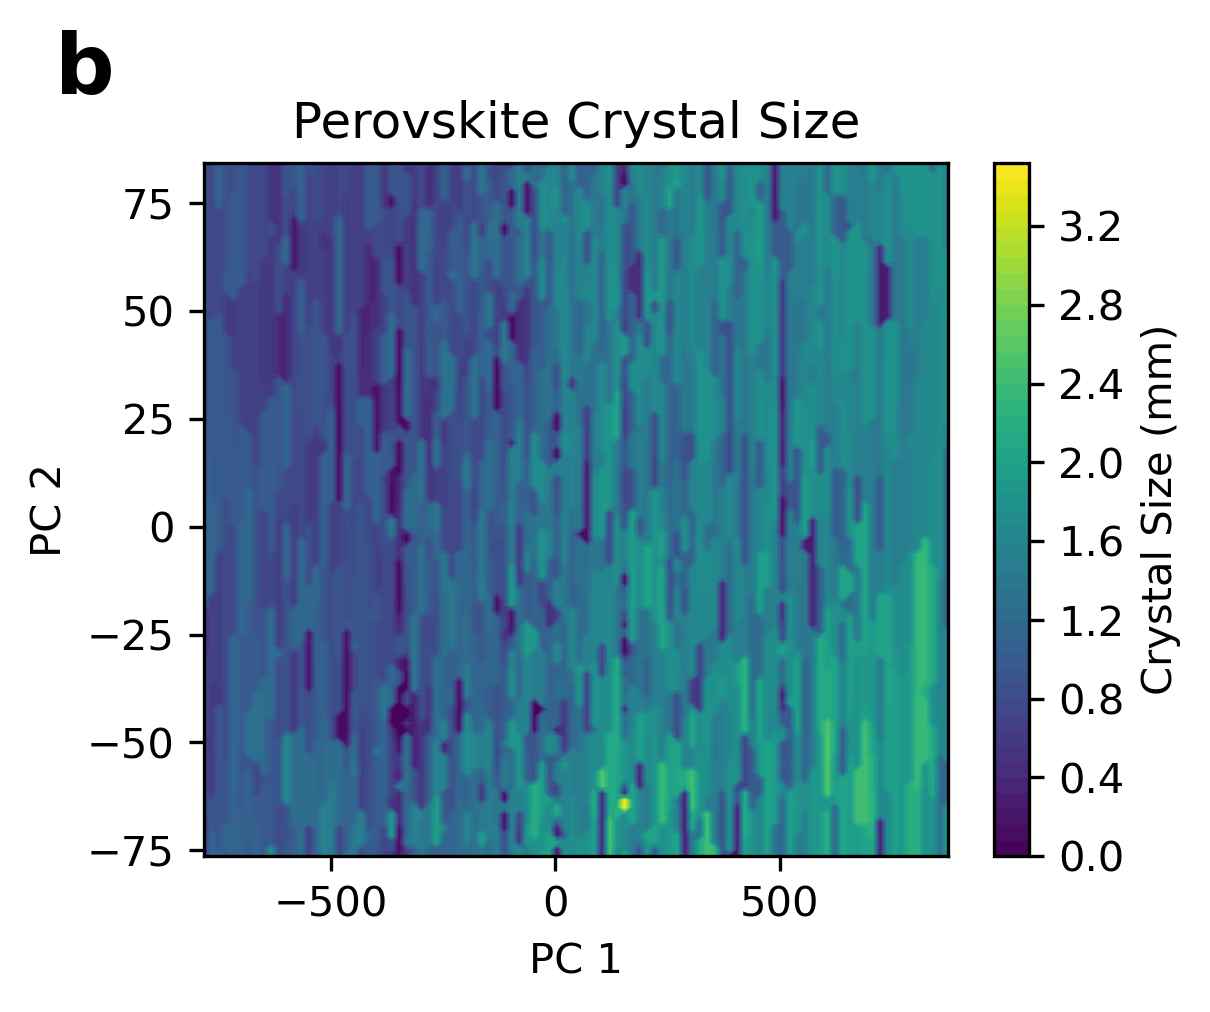

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# X_train, y_train: 訓練資料特徵與對應預測值
# rf_model: 已訓練好的模型

# 1. PCA降維
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# 2. 建立網格
grid_size = 100
x_min, x_max = X_train_pca[:,0].min(), X_train_pca[:,0].max()
y_min, y_max = X_train_pca[:,1].min(), X_train_pca[:,1].max()

x_min, x_max = np.percentile(X_train_pca[:,0], [5, 95])
y_min, y_max = np.percentile(X_train_pca[:,1], [5, 95])


xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                     np.linspace(y_min, y_max, grid_size))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# 3. 找每個網格點在訓練點PCA空間的最近鄰對應原始特徵
nn = NearestNeighbors(n_neighbors=1).fit(X_train_pca)
distances, indices = nn.kneighbors(grid_points)

# 對應的高維特徵
X_grid_highdim = X_train[indices.flatten()]

# 4. 用模型預測
y_pred_grid = rf_model.predict(X_grid_highdim)
y_pred_grid = y_pred_grid.reshape(grid_size, grid_size)


# 5. 畫heat map
plt.figure(figsize=(4,3), dpi = 300)

plt.contourf(xx, yy, y_pred_grid, levels=50, cmap='viridis')
plt.colorbar(label='Crystal Size (mm)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.text(-0.2, 1.1, 'b', fontsize=20, fontweight='bold', transform=plt.gca().transAxes)


plt.title('\nPerovskite Crystal Size')
plt.savefig('/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/4_Final_Anslysis_Like_EDBO/GT_smooth_pvk.jpeg', bbox_inches='tight', dpi=300)
plt.show()



TypeError: Shapes of x (50, 50) and z (100, 100) do not match

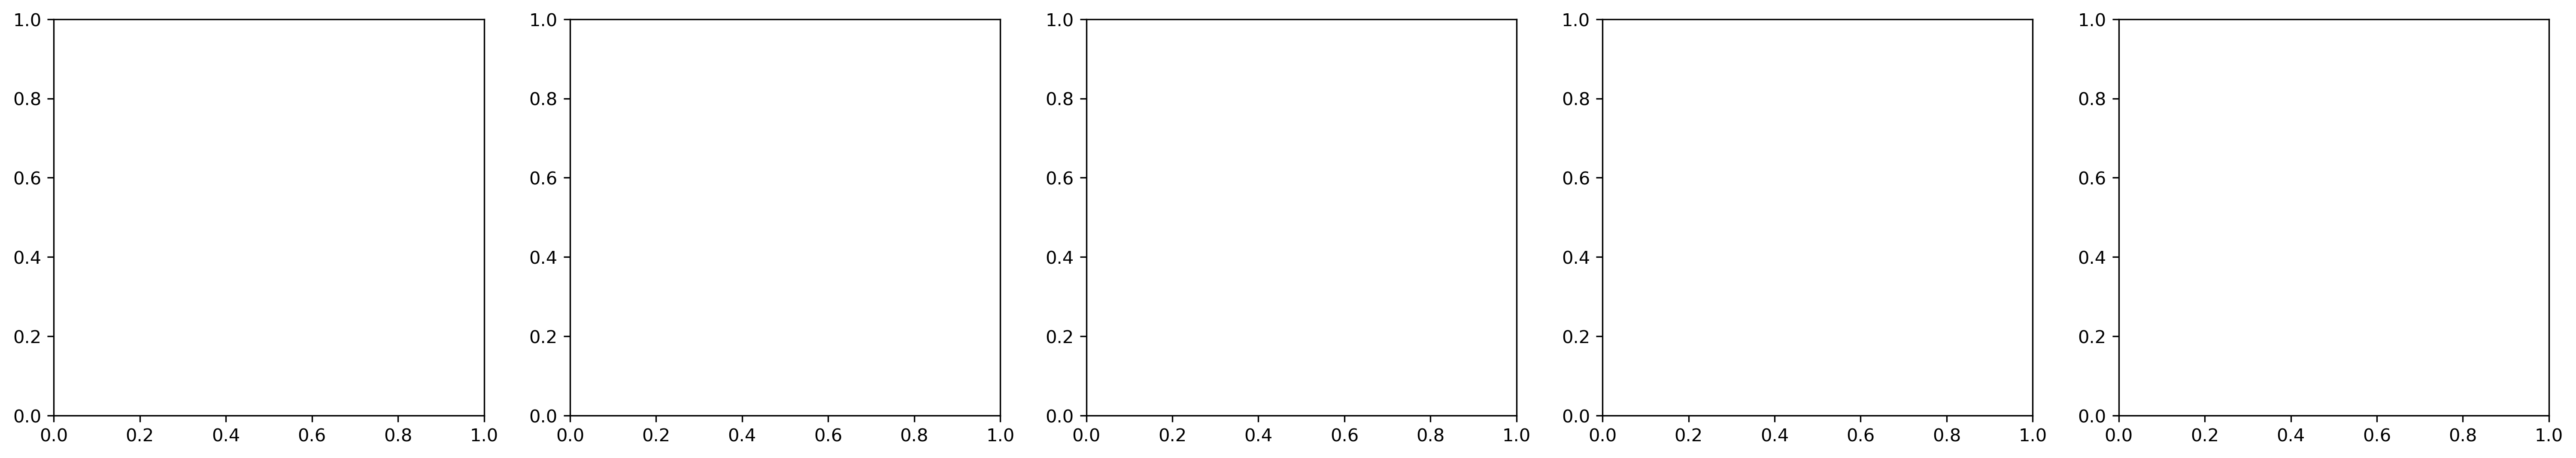

In [12]:
# highlight_indices: list 或 array，包含你想標記的10個點在X_train中的索引
# global search

# 取得這10點在PCA空間的座標
random = X_train_pca[0:500]
abc = X_train_pca[500:1000]
pso = X_train_pca[1000:1500]

method = X_train_pca[0:1500]


fig, axs = plt.subplots(1, 5, figsize=(25, 4), dpi=300)
for i in range(5):
    # 绘制 heatmap
    contour = axs[i].contourf(xx, yy, y_pred_grid, levels=50, cmap='viridis')
    fig.colorbar(contour, ax=axs[i], label='Crystal Size (mm)')  # 添加 colorbar

    axs[i].set_xlabel('PC1')
    axs[i].set_ylabel('PC2')
    axs[i].set_title(f'Batch {i+1}')
    axs[i].set_ylim(-80, 90)
    axs[i].set_xlim(-100, 100)

    # 绘制散点图
    axs[i].scatter(method[i*100:(i+1)*100][:, 0], method[i*100:(i+1)*100][:, 1],
                color='black', s=10, marker='o')

    axs[i].scatter(method[500+(i*100):500+((i+1)*100)][:, 0], method[500+(i*100):500+((i+1)*100)][:, 1],
        color='red', s=10, marker='o')

    axs[i].scatter(method[1000+(i*100):1000+((i+1)*100)][:, 0], method[1000+(i*100):1000+((i+1)*100)][:, 1],
        color='blue', s=10, marker='o')

    #axs[i].legend()  # 添加图例

plt.tight_layout()  # 调整子图布局
plt.show()


In [8]:
import numpy as np

# 設定格子大小
grid_size = 50  # 調小可提高解析度

# 定義全範圍
x_min, x_max = -1000, 1200
y_min, y_max = -80, 90

def coverage_rate(points, grid_size):
    gx = ((points[:, 0] - x_min) // grid_size).astype(int)
    gy = ((points[:, 1] - y_min) // grid_size).astype(int)
    grid_coords = set(zip(gx, gy))
    total_grids = ((x_max - x_min) // grid_size + 1) * ((y_max - y_min) // grid_size + 1)
    return len(grid_coords) / total_grids * 100

print(f"Coverage Rate per Batch (grid={grid_size}):")
print("Batch | Black  | Red    | Blue")
for i in range(5):
    black_points = method[i*100:(i+1)*100]
    red_points   = method[500+(i*100):500+((i+1)*100)]
    blue_points  = method[1000+(i*100):1000+((i+1)*100)]

    black_cov = coverage_rate(black_points, grid_size)
    red_cov   = coverage_rate(red_points, grid_size)
    blue_cov  = coverage_rate(blue_points, grid_size)

    print(f"{i+1:5d} | {black_cov:6.2f}% | {red_cov:6.2f}% | {blue_cov:6.2f}%")

import numpy as np

# 設定格子大小
grid_size = 50  # 調小數字會更精細

# 定義全範圍
x_min, x_max = -1000, 1200
y_min, y_max = -80, 90

# 三種方法的所有點
black_points = method[0:500]
red_points   = method[500:1000]
blue_points  = method[1000:1500]

def coverage_rate(points, grid_size):
    # 計算每個點的格子座標
    gx = ((points[:, 0] - x_min) // grid_size).astype(int)
    gy = ((points[:, 1] - y_min) // grid_size).astype(int)
    grid_coords = set(zip(gx, gy))
    total_grids = ((x_max - x_min) // grid_size + 1) * ((y_max - y_min) // grid_size + 1)
    return len(grid_coords) / total_grids * 100

black_cov = coverage_rate(black_points, grid_size)
red_cov   = coverage_rate(red_points, grid_size)
blue_cov  = coverage_rate(blue_points, grid_size)

print(f"Coverage Rate (grid={grid_size}):")
print(f"Black - {black_cov:.2f}%")
print(f"Red   - {red_cov:.2f}%")
print(f"Blue  - {blue_cov:.2f}%")



Coverage Rate per Batch (grid=50):
Batch | Black  | Red    | Blue
    1 |  41.11% |  40.56% |  38.33%
    2 |  40.56% |  31.11% |  35.56%
    3 |  37.78% |  39.44% |  40.56%
    4 |  42.78% |  40.56% |  36.11%
    5 |  36.11% |  36.67% |  38.89%
Coverage Rate (grid=50):
Black - 96.67%
Red   - 88.89%
Blue  - 94.44%


In [9]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def calc_uniformity(points):
    # 最近鄰距離（排除自己）
    nbrs = NearestNeighbors(n_neighbors=2).fit(points)
    distances, _ = nbrs.kneighbors(points)
    mean_dist = distances[:, 1].mean()  # 忽略自己距離(第0個)
    cv = distances[:, 1].std() / mean_dist  # 變異係數
    return mean_dist, cv

for i in range(5):
    # 分三組點
    black_points = method[i*100:(i+1)*100]
    red_points   = method[500+(i*100):500+((i+1)*100)]
    blue_points  = method[1000+(i*100):1000+((i+1)*100)]

    # 計算 uniformity
    black_mean, black_cv = calc_uniformity(black_points)
    red_mean, red_cv = calc_uniformity(red_points)
    blue_mean, blue_cv = calc_uniformity(blue_points)

    print(f"Batch {i+1}:")
    print(f"  Black - mean_dist: {black_mean:.4f}, CV: {black_cv:.4f}")
    print(f"  Red   - mean_dist: {red_mean:.4f}, CV: {red_cv:.4f}")
    print(f"  Blue  - mean_dist: {blue_mean:.4f}, CV: {blue_cv:.4f}")
    print()


Batch 1:
  Black - mean_dist: 47.5454, CV: 2.3186
  Red   - mean_dist: 42.4483, CV: 1.2895
  Blue  - mean_dist: 151.3434, CV: 6.6533

Batch 2:
  Black - mean_dist: 42.3663, CV: 1.1681
  Red   - mean_dist: 35.2415, CV: 2.0768
  Blue  - mean_dist: 81.0040, CV: 4.6498

Batch 3:
  Black - mean_dist: 37.8634, CV: 1.4450
  Red   - mean_dist: 40.5026, CV: 2.7889
  Blue  - mean_dist: 44.4229, CV: 1.7435

Batch 4:
  Black - mean_dist: 51.9531, CV: 2.3370
  Red   - mean_dist: 40.4084, CV: 1.6755
  Blue  - mean_dist: 33.3654, CV: 1.3317

Batch 5:
  Black - mean_dist: 48.5989, CV: 2.1432
  Red   - mean_dist: 29.8607, CV: 0.8629
  Blue  - mean_dist: 37.6629, CV: 1.5394



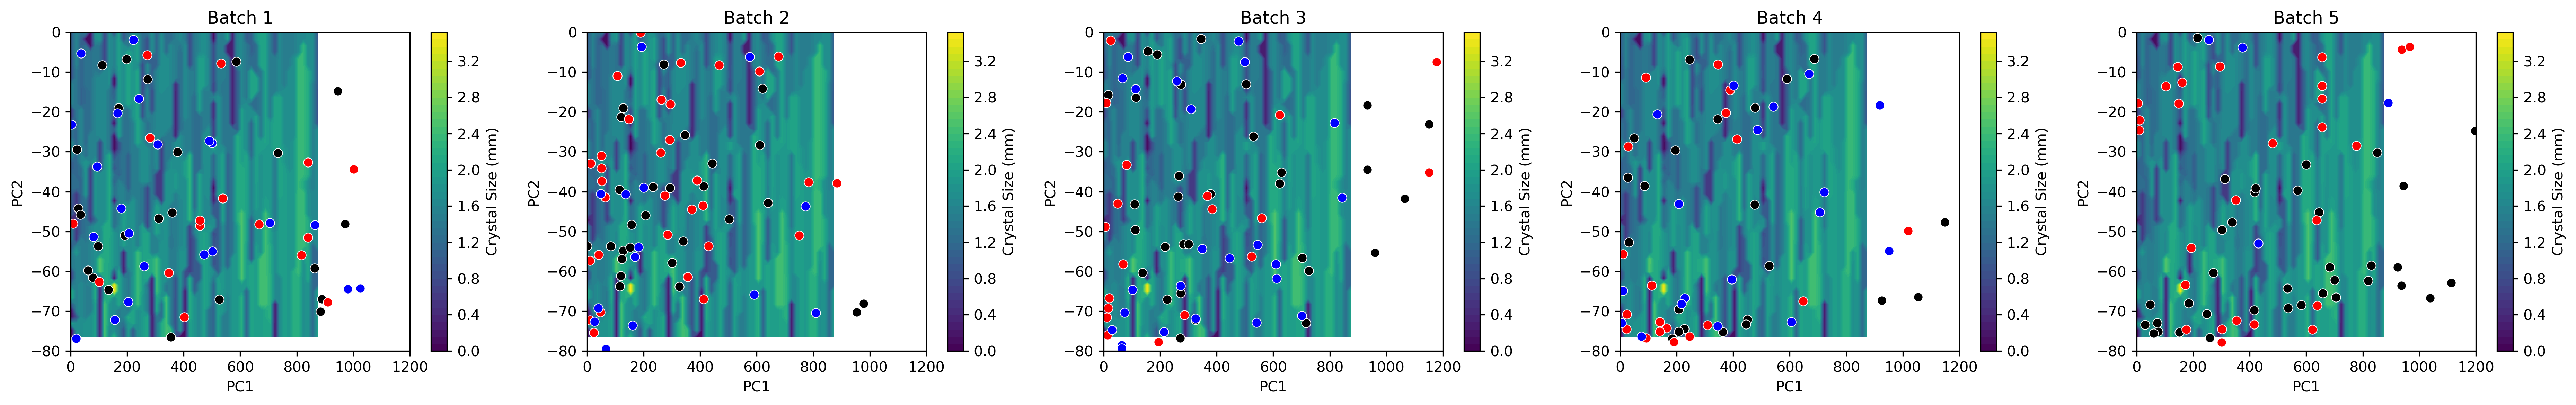

Batch | Black | Red | Blue
    1 |    24 |  16 |  22
    2 |    27 |  36 |  14
    3 |    31 |  19 |  24
    4 |    22 |  19 |  18
    5 |    36 |  27 |   4

Mean  | 28.00 | 23.40 | 16.40
Std   | 5.02 | 7.28 | 7.09


In [10]:
import numpy as np

fig, axs = plt.subplots(1, 5, figsize=(25, 4), dpi=300)
counts = []

# 顯示範圍
x_min, x_max = 0, 1200
y_min, y_max = -80, 0

for i in range(5):
    contour = axs[i].contourf(xx, yy, y_pred_grid, levels=50, cmap='viridis')
    fig.colorbar(contour, ax=axs[i], label='Crystal Size (mm)')

    axs[i].set_xlabel('PC1')
    axs[i].set_ylabel('PC2')
    axs[i].set_title(f'Batch {i+1}')
    axs[i].set_xlim(x_min, x_max)
    axs[i].set_ylim(y_min, y_max)

    # 三種顏色的原始資料切片
    black_points = method[i*100:(i+1)*100]
    red_points   = method[500+(i*100):500+((i+1)*100)]
    blue_points  = method[1000+(i*100):1000+((i+1)*100)]

    # 篩選在顯示範圍內的點
    def filter_range(points):
        return points[(points[:, 0] >= x_min) & (points[:, 0] <= x_max) &
                      (points[:, 1] >= y_min) & (points[:, 1] <= y_max)]

    black_in = filter_range(black_points)
    red_in   = filter_range(red_points)
    blue_in  = filter_range(blue_points)

    # 畫出範圍內的點
    axs[i].scatter(black_in[:, 0], black_in[:, 1], color='black', s=40, marker='o',edgecolor='white', linewidths=0.5)
    axs[i].scatter(red_in[:, 0],   red_in[:, 1],   color='red',   s=40, marker='o',edgecolor='white', linewidths=0.5)
    axs[i].scatter(blue_in[:, 0],  blue_in[:, 1],  color='blue',  s=40, marker='o',edgecolor='white', linewidths=0.5)

    # 統計數量
    counts.append([
        len(black_in),
        len(red_in),
        len(blue_in)
    ])

plt.tight_layout()
plt.show()

# 轉成 NumPy array 方便統計
counts_arr = np.array(counts)  # shape = (5, 3)

# 輸出各 batch 數量
print("Batch | Black | Red | Blue")
for i, (b, r, bl) in enumerate(counts_arr, start=1):
    print(f"{i:5d} | {b:5d} | {r:3d} | {bl:3d}")

# 計算 mean / std
mean_vals = counts_arr.mean(axis=0)
std_vals = counts_arr.std(axis=0)

print("\nMean  | {:.2f} | {:.2f} | {:.2f}".format(*mean_vals))
print("Std   | {:.2f} | {:.2f} | {:.2f}".format(*std_vals))


TypeError: Shapes of x (50, 50) and z (100, 100) do not match

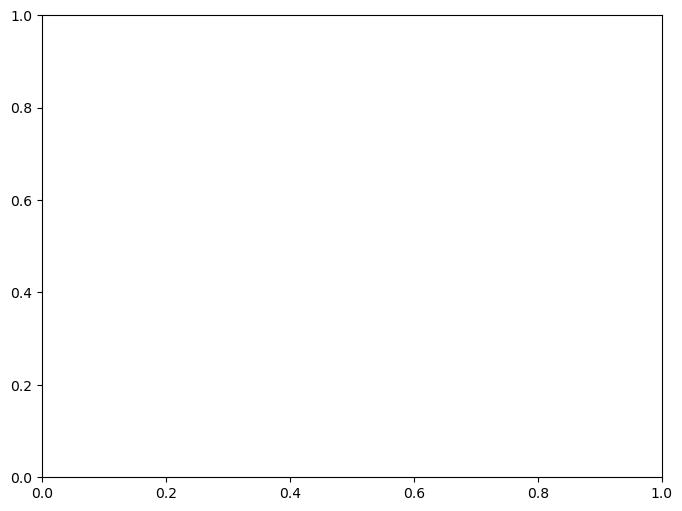

In [11]:
# 取得這10點在PCA空間的座標
highlight_points_pca = X_train_pca

# 繪製heatmap
x_min, x_max = np.percentile(X_train_pca[:,0], [1, 99])
y_min, y_max = np.percentile(X_train_pca[:,1], [1, 99])
xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                     np.linspace(y_min, y_max, grid_size))
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred_grid, levels=50, cmap='viridis')
plt.colorbar(label='Predicted Value')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.ylim(-80, 80)
plt.xlim(-1200, 1200)
plt.title('Heatmap of Model Prediction in PCA Space')

# 標出10個點
plt.scatter(highlight_points_pca[:,0], highlight_points_pca[:,1],
            color='red', edgecolors='black', s=60, marker='o', label='Input points')

plt.legend()
plt.show()
